<a href="https://colab.research.google.com/github/NicoPatalagua/Scikit-learn/blob/master/Sci_Kit_Learn_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sci-KitLearn
## Nicolás Patalagua

# Ejemplo C: Regresión Lineal

$Sci-Kit Learn$ es un poderoso módulo de Python para el aprendizaje de máquina. 
Contiene funciones de regresión, clasificación, agrupación, selección de modelos y reducción de la dimensionalidad. 

El ejemplo se utilizará el módulo <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model</a> que contiene 
"métodos destinados a la regresión en los que se espera que el $Target$ Value 
sea una combinación lineal de las variables de entrada $features$".

## 1.- Se cargan las bibliotecas con sus módulos correspondientes

In [0]:
import numpy as np #Soporte para vectores y matrices
import pandas as pd #Manipulación y análisis de datos 
import scipy.stats as stats #Aplicaciones estadistica 
import matplotlib.pyplot as plt #Gráficas a partir de datos 
from sklearn.linear_model import LinearRegression #Modelo de regresión lineal
#incorporar las gráficas en este documento
%matplotlib inline 

## 2.- Exporación y preparación del conjunto de datos 

In [0]:
#Lectura del csv
dataF = pd.read_csv('Advertising.csv')
#Cabecera del dataset
dataF.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 3.- A continuación se ajustará el modelo de regresión lineal y predecir 
Para estimar los coeficientes se usará el método de <a href="https://www.varsitytutors.com/hotmath/hotmath_help/spanish/topics/line-of-best-fit">Mínimos Cuadrados.</a>. 

### X = dataF["TV"] (o variables independientes)
### Y = dataF["sales"]


### Las funciones importantes a tener en cuenta al ajustar un modelo de regresión lineal son:

**lm.fit()**     -> Ajusta a un modelo lineal

**lm.predict()** -> Predecir **$Y$** usando el modelo lineal con coeficientes estimados

**lm.score()**   -> Devuelve el <a href="https://www.addlink.es/noticias/minitab/2736-como-interpretar-un-modelo-de-regresion-con-bajo-coeficiente-de-determinacion-r-cuadrado-y-bajos-valores-p">coeficiente de determinación (R$^2$)</a>. 
 
 - [Una medida de cuán bien se replican los resultados observados por el modelo, 
como la proporción de la variación total de los resultados explicada por el modelo.]
    

### Por hacer
- Diagrama de dispersión (X;Y).
- Ajuste a modelo lineal
- Selección del modelo lineal
- Entrenamiento del modelo
- Impresión coeficientes e intersepción.
- Diagrama de Dispersión.

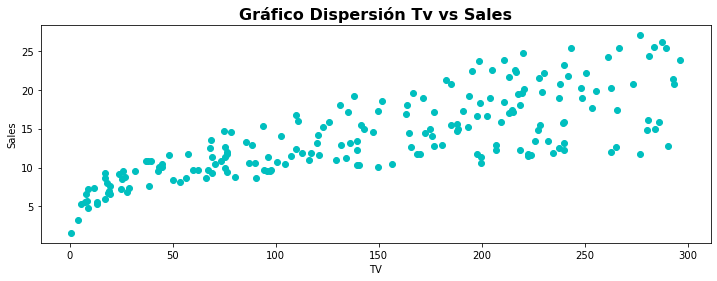

In [0]:
#Graficamos el diagrama de dispersión
plt.figure(figsize=(12, 4))
plt.scatter(
    dataF['TV'],
    dataF['sales'],
    c='c'
)
plt.title("Gráfico Dispersión Tv vs Sales", fontsize=16, fontweight='bold')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [0]:
#Asignamos valores a las variables x y y
X = dataF["TV"].values.reshape(-1,1)
y = dataF["sales"].values.reshape(-1,1)

In [0]:
# Selección a modelo lineal
modelo = LinearRegression()

In [0]:
# Entrenar el model0
modelo.fit(X, y)
y_predicted = modelo.predict(X)

In [0]:
# Impresión de intercepción, coeficientes y numero de coeficientes
t0, t1 = modelo.intercept_[0], modelo.coef_[0][0]
print('Intercepción: ',t0,'\n Coeficientes: ',t1)

Intercepción:  7.032593549127687 
 Coeficientes:  0.047536640433019806


In [0]:
print('Coeficiente: ',modelo.coef_)
print('Tamaño coeficiente: ',len(modelo.coef_))
print('Intercepción: ',modelo.intercept_)

Coeficiente:  [[0.04753664]]
Tamaño coeficiente:  1
Intercepción:  [7.03259355]


## 4.-  Predicción 

- Se calcula la predicción $\hat{Y}_i$ (.predict)
- Diagrama de dispersión 

In [0]:
# Make a prediction
X_new = [[3000]]  
print(modelo.predict(X_new))

[[149.64251485]]


## 5.- Se calcula el <a href=https://acolita.com/que-es-el-error-cuadratico-medio-rmse/>Error Cuadrático Medio y la presición del modelo</a>.

El Root Mean Square Error (RMSE) es la desviación estándar de los residuos (errores de predicción). Los residuos son una medida de cuán lejos de la línea de regresión están los puntos de datos; RMSE es una medida de cuán extendidos están estos residuos. En otras palabras, presenta cuán concentrados están los datos alrededor de la línea de mejor ajuste.

- Entre el Real y la predicción 
- modelo.score()

In [0]:
# Imprimimos MSE, RMSE y r2_score
from sklearn.metrics import mean_squared_error, r2_score
import math
mseTOTAL = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
print("Error Cuadrático Medio (MSE): ", mseTOTAL)
print("RMSE: ", math.sqrt(mseTOTAL))
print("r2_score", r2)

Error Cuadrático Medio (MSE):  10.512652915656759
RMSE:  3.2423221486546887
r2_score 0.611875050850071
